***Prueba de MIL con rsna usando features de ResNet-18***

In [1]:
import sys
print(sys.executable)

/home/javitrucas/miniconda3/envs/tfg/bin/python


In [2]:
import os
import sys
import torch
import wandb
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sys
import os

# Agregar el directorio raíz del proyecto a sys.path
project_root = "/home/javitrucas/TFG"
if project_root not in sys.path:
    sys.path.append(project_root)

In [4]:
from scripts.dataset_loader import load_dataset
from scripts.medical_scripts.medical_evaluation import ModelEvaluator
from scripts.medical_scripts.medical_training import Training
from scripts.MIL_utils import MIL_collate_fn

from types import SimpleNamespace
from box import Box

/home/javitrucas/miniconda3/envs/tfg/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/javitrucas/miniconda3/envs/tfg/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_results(results):
    """
    Visualiza las métricas de entrenamiento, validación y prueba.
    Los resultados deben contener claves específicas para cada métrica.
    """
    
    # 1. Matriz de confusión
    if "confusion_matrix" in results:
        cm = results["confusion_matrix"]
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title("Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()

    # 2. Curvas de pérdida (loss)
    if "train_loss_curve" in results or "val_loss_curve" in results or "test_loss_curve" in results:
        plt.figure(figsize=(10, 6))
        if "train_loss_curve" in results:
            plt.plot(results["train_loss_curve"], label="Training Loss", color="blue")
        if "val_loss_curve" in results:
            plt.plot(results["val_loss_curve"], label="Validation Loss", color="orange")
        if "test_loss_curve" in results:
            plt.plot(results["test_loss_curve"], label="Test Loss", color="green")
        plt.title("Loss Curves")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.grid()
        plt.show()

    # 3. Curvas de precisión (accuracy)
    if "train_accuracy_curve" in results or "val_accuracy_curve" in results or "test_accuracy_curve" in results:
        plt.figure(figsize=(10, 6))
        if "train_accuracy_curve" in results:
            plt.plot(results["train_accuracy_curve"], label="Training Accuracy", color="blue")
        if "val_accuracy_curve" in results:
            plt.plot(results["val_accuracy_curve"], label="Validation Accuracy", color="orange")
        if "test_accuracy_curve" in results:
            plt.plot(results["test_accuracy_curve"], label="Test Accuracy", color="green")
        plt.title("Accuracy Curves")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.grid()
        plt.show()

    # 4. F1-Score
    if "train_f1_score" in results or "val_f1_score" in results or "test_f1_score" in results:
        plt.figure(figsize=(10, 6))
        if "train_f1_score" in results:
            plt.plot(results["train_f1_score"], label="Training F1-Score", color="blue")
        if "val_f1_score" in results:
            plt.plot(results["val_f1_score"], label="Validation F1-Score", color="orange")
        if "test_f1_score" in results:
            plt.plot(results["test_f1_score"], label="Test F1-Score", color="green")
        plt.title("F1-Score Curves")
        plt.xlabel("Epochs")
        plt.ylabel("F1-Score")
        plt.legend()
        plt.grid()
        plt.show()

    # 5. AUC-ROC
    if "train_auc_roc" in results or "val_auc_roc" in results or "test_auc_roc" in results:
        plt.figure(figsize=(10, 6))
        if "train_auc_roc" in results:
            plt.plot(results["train_auc_roc"], label="Training AUC-ROC", color="blue")
        if "val_auc_roc" in results:
            plt.plot(results["val_auc_roc"], label="Validation AUC-ROC", color="orange")
        if "test_auc_roc" in results:
            plt.plot(results["test_auc_roc"], label="Test AUC-ROC", color="green")
        plt.title("AUC-ROC Curves")
        plt.xlabel("Epochs")
        plt.ylabel("AUC-ROC")
        plt.legend()
        plt.grid()
        plt.show()

    # 6. Precision
    if "train_precision" in results or "val_precision" in results or "test_precision" in results:
        plt.figure(figsize=(10, 6))
        if "train_precision" in results:
            plt.plot(results["train_precision"], label="Training Precision", color="blue")
        if "val_precision" in results:
            plt.plot(results["val_precision"], label="Validation Precision", color="orange")
        if "test_precision" in results:
            plt.plot(results["test_precision"], label="Test Precision", color="green")
        plt.title("Precision Curves")
        plt.xlabel("Epochs")
        plt.ylabel("Precision")
        plt.legend()
        plt.grid()
        plt.show()

    # 7. Recall
    if "train_recall" in results or "val_recall" in results or "test_recall" in results:
        plt.figure(figsize=(10, 6))
        if "train_recall" in results:
            plt.plot(results["train_recall"], label="Training Recall", color="blue")
        if "val_recall" in results:
            plt.plot(results["val_recall"], label="Validation Recall", color="orange")
        if "test_recall" in results:
            plt.plot(results["test_recall"], label="Test Recall", color="green")
        plt.title("Recall Curves")
        plt.xlabel("Epochs")
        plt.ylabel("Recall")
        plt.legend()
        plt.grid()
        plt.show()

    # 8. AUROC (Area Under the Receiver Operating Characteristic Curve)
    if "train_auroc" in results or "val_auroc" in results or "test_auroc" in results:
        plt.figure(figsize=(10, 6))
        if "train_auroc" in results:
            plt.plot(results["train_auroc"], label="Training AUROC", color="blue")
        if "val_auroc" in results:
            plt.plot(results["val_auroc"], label="Validation AUROC", color="orange")
        if "test_auroc" in results:
            plt.plot(results["test_auroc"], label="Test AUROC", color="green")
        plt.title("AUROC Curves")
        plt.xlabel("Epochs")
        plt.ylabel("AUROC")
        plt.legend()
        plt.grid()
        plt.show()

    # 9. Learning Rate (si está disponible)
    if "learning_rate" in results:
        plt.figure(figsize=(10, 6))
        plt.plot(results["learning_rate"], label="Learning Rate", color="purple")
        plt.title("Learning Rate Schedule")
        plt.xlabel("Epochs")
        plt.ylabel("Learning Rate")
        plt.legend()
        plt.grid()
        plt.show()

In [ ]:
def run_experiment(config):
    # Crear un objeto temporal para compatibilidad
    class TempConfig:
        def __init__(self, config_dict):
            self.__dict__.update(config_dict)

    config_obj = TempConfig(config)

    # Iniciar wandb
    wandb.init(
        project="TFG",
        config=config
    )

    # Parámetros controlados dentro del código
    dataset_name = config_obj.dataset_name
    num_epochs = config_obj.num_epochs
    learning_rate = config_obj.learning_rate
    batch_size = config_obj.batch_size

    # Directorio para guardar modelos
    output_model_dir = f"./models/{dataset_name.split('-')[0]}"
    os.makedirs(output_model_dir, exist_ok=True)

    # Cargar datasets usando dataset_loader.py
    train_dataset, val_dataset = load_dataset(config=config, mode="train_val")
    test_dataset = load_dataset(config=config, mode="test")

    # Crear dataloaders con MIL_collate_fn
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=MIL_collate_fn)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=MIL_collate_fn)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=MIL_collate_fn)

    # Iniciar el entrenamiento
    trainer = Training(
        train_loader=train_loader,
        val_loader=val_loader,
        num_epochs=num_epochs,
        learning_rate=learning_rate,
        output_model_dir=output_model_dir,
        wandb=wandb
    )
    trainer.train()

    # Guardar el modelo como un artefacto en wandb
    model_path = os.path.join(output_model_dir, 'model.pth')
    artifact = wandb.Artifact('model', type='model')
    artifact.add_file(model_path)
    wandb.log_artifact(artifact)

    # Iniciar la evaluación
    evaluator = ModelEvaluator(
        model_path=model_path,
        test_loader=test_loader,
        batch_size=batch_size,
        wandb=wandb
    )
    results = evaluator.evaluate()

    luego_actualizar = """
    # Agregar métricas adicionales a results si no están incluidas
    results.update({
        "train_loss_curve": trainer.train_loss_curve,
        "val_loss_curve": trainer.val_loss_curve,
        "train_accuracy_curve": trainer.train_accuracy_curve,
        "val_accuracy_curve": trainer.val_accuracy_curve,
        "test_loss_curve": evaluator.test_loss_curve,
        "test_accuracy_curve": evaluator.test_accuracy_curve,
        "train_f1_score": trainer.train_f1_score,
        "val_f1_score": trainer.val_f1_score,
        "test_f1_score": evaluator.test_f1_score,
        "train_auc_roc": trainer.train_auc_roc,
        "val_auc_roc": trainer.val_auc_roc,
        "test_auc_roc": evaluator.test_auc_roc,
        "train_precision": trainer.train_precision,
        "val_precision": trainer.val_precision,
        "test_precision": evaluator.test_precision,
        "train_recall": trainer.train_recall,
        "val_recall": trainer.val_recall,
        "test_recall": evaluator.test_recall,
        "confusion_matrix": evaluator.confusion_matrix
    })
    """

    # Visualizar resultados
    visualize_results(results)

    # Finalizar wandb
    wandb.finish()

rsna
[RSNADataset] Scanning files...
[RSNADataset] Found 1000 already processed bags
[RSNADataset] Number of bags found: 1000
rsna
[RSNADataset] Scanning files...
[RSNADataset] Found 150 already processed bags
[RSNADataset] Number of bags found: 150
Epoch 1/4, Train Loss: 0.6647, Train Accuracy: 0.6100, Val Loss: 0.6311, Val Accuracy: 0.6650
Final model saved to ./models/rsna/model.pth
Epoch 2/4, Train Loss: 0.5961, Train Accuracy: 0.6750, Val Loss: 0.5815, Val Accuracy: 0.7200
Final model saved to ./models/rsna/model.pth
Epoch 3/4, Train Loss: 0.5602, Train Accuracy: 0.7175, Val Loss: 0.5502, Val Accuracy: 0.7250
Final model saved to ./models/rsna/model.pth
Epoch 4/4, Train Loss: 0.4955, Train Accuracy: 0.7562, Val Loss: 0.5799, Val Accuracy: 0.7100
Final model saved to ./models/rsna/model.pth
Model loaded successfully from ./models/rsna/model.pth

--- Evaluation Results ---
Optimal Threshold: 0.3220
Accuracy: 0.7733, AUC: 0.8549
Precision: 0.7794, Recall: 0.7361, F1-Score: 0.7571
Con

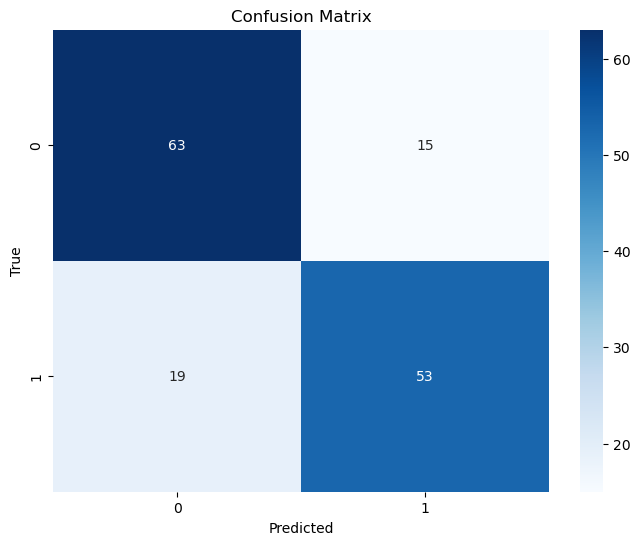

epoch,▁▃▆█
test_accuracy,▁
test_auc,▁
test_f1,▁
test_precision,▁
test_recall,▁
train_accuracy,▁▄▆█
train_loss,█▅▄▁
val_accuracy,▁▇█▆
val_auc,▁▅▇█
val_f1,█▆▇▁


In [ ]:
# Convertir config_1 en un objeto usando Box
config_1 = Box({
    "dataset_name": "rsna-features_resnet18",
    "num_epochs": 50,
    "learning_rate": 1e-3,
    "batch_size": 1,
    "val_prop": 0.2,
    "seed": 42,
    "use_inst_distances": False,
    "adj_mat_mode": "relative"
})

# Ejecutar el experimento
run_experiment(config_1)

In [ ]:
# Convertir config_2 en un objeto usando Box
config_2 = Box({
    "dataset_name": "rsna-features_resnet18",
    "num_epochs": 50,
    "learning_rate": 1e-4,
    "batch_size": 1,
    "val_prop": 0.2,
    "seed": 42,
    "use_inst_distances": False,
    "adj_mat_mode": "relative"
})

# Ejecutar el experimento
run_experiment(config_2)

rsna
[RSNADataset] Scanning files...


KeyboardInterrupt: 